In [1]:
import numpy as np
import matplotlib.pyplot as plt
import genfibers as gf
import scipy.signal as sig
import json

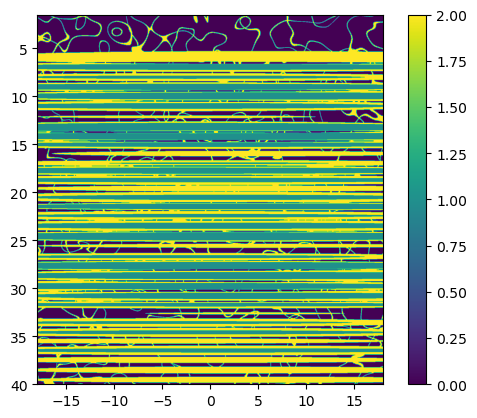

In [8]:
mapfile = np.fromfile("map.bin", dtype=np.int8).reshape((1545,1621)).T

extent = 1E3*np.array([0-18.73E-3, 1545*1540/(12*5.2E6)-18.73E-3, 1621*1540/(12*5.2E6), 0])

plt.figure()
plt.imshow(mapfile, extent=extent)
plt.xlim(-18, 18)
plt.ylim(40, 1.5)
plt.colorbar()
plt.show()

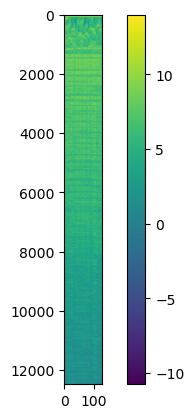

In [9]:
bindata = np.fromfile("exfiles/deg0.bin", dtype=np.double)
bindata = bindata.reshape((128,-1)).T

plt.figure()
plt.imshow(np.log(np.abs(bindata)), aspect=0.1)
plt.colorbar()
plt.show()

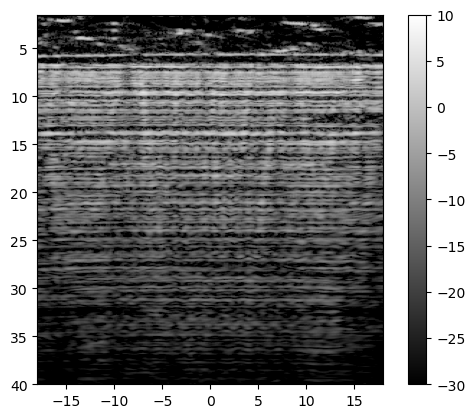

In [4]:
bindata = np.fromfile("exfiles/deg0_bf.bin", dtype=np.double)
bindata = bindata.reshape((267,-1)).T

env = np.abs(sig.hilbert(bindata, axis=0))
logged = 20*np.log10(env/np.percentile(env, 99))
plt.figure()
plt.imshow(logged, extent = [-20, 20, 40, 1.5], vmin=-30, vmax=10, cmap='gray')
plt.xlim(-18, 18)
plt.colorbar()
plt.show()

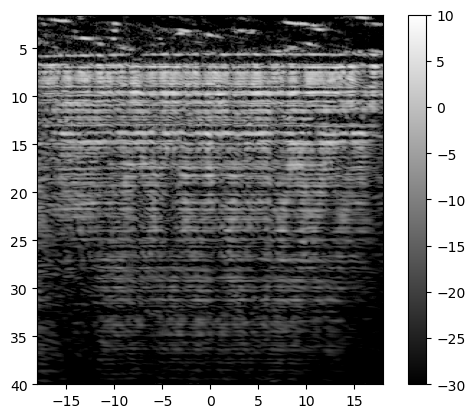

In [5]:
bindata = np.fromfile("exfiles/deg-8_bf.bin", dtype=np.double)
bindata = bindata.reshape((267,-1)).T

env = np.abs(sig.hilbert(bindata, axis=0))
logged = 20*np.log10(env/np.percentile(env, 99))
plt.figure()
plt.imshow(logged, extent = [-20, 20, 40, 1.5], vmin=-30, vmax=10, cmap='gray')
plt.xlim(-18, 18)
plt.colorbar()
plt.show()

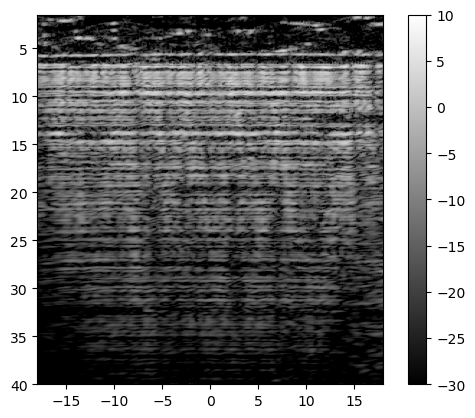

In [6]:
bindata = np.fromfile("exfiles/deg8_bf.bin", dtype=np.double)
bindata = bindata.reshape((267,-1)).T

env = np.abs(sig.hilbert(bindata, axis=0))
logged = 20*np.log10(env/np.percentile(env, 99))
plt.figure()
plt.imshow(logged, extent = [-20, 20, 40, 1.5], vmin=-30, vmax=10, cmap='gray')
plt.xlim(-18, 18)
plt.colorbar()
plt.show()

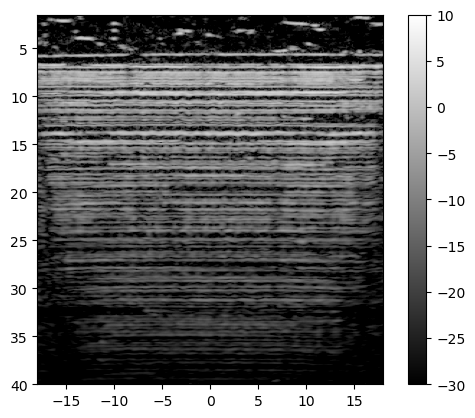

In [7]:
files = ["exfiles/deg-8_bf.bin","exfiles/deg0_bf.bin","exfiles/deg8_bf.bin"]

bindata = 0
for file in files:
    bindata += np.fromfile(file, dtype=np.double)
bindata = bindata.reshape((267,-1)).T

env = np.abs(sig.hilbert(bindata, axis=0))
logged = 20*np.log10(env/np.percentile(env, 99))
plt.figure()
plt.imshow(logged, extent = [-20, 20, 40, 1.5], vmin=-30, vmax=10, cmap='gray')
plt.xlim(-18, 18)
plt.colorbar()
plt.show()

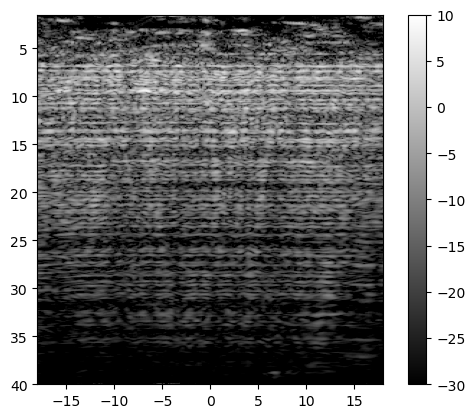

In [14]:
bindata = np.fromfile("exfiles_wscat/deg0_bf.bin", dtype=np.double)
bindata = bindata.reshape((267,-1)).T

env = np.abs(sig.hilbert(bindata, axis=0))
logged = 20*np.log10(env/np.percentile(env, 99))
plt.figure()
plt.imshow(logged, extent = [-20, 20, 40, 1.5], vmin=-30, vmax=10, cmap='gray')
plt.xlim(-18, 18)
plt.colorbar()
plt.show()

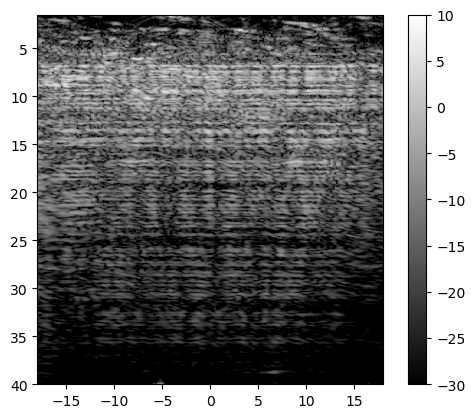

In [15]:
bindata = np.fromfile("exfiles_wscat/deg-8_bf.bin", dtype=np.double)
bindata = bindata.reshape((267,-1)).T

env = np.abs(sig.hilbert(bindata, axis=0))
logged = 20*np.log10(env/np.percentile(env, 99))
plt.figure()
plt.imshow(logged, extent = [-20, 20, 40, 1.5], vmin=-30, vmax=10, cmap='gray')
plt.xlim(-18, 18)
plt.colorbar()
plt.show()

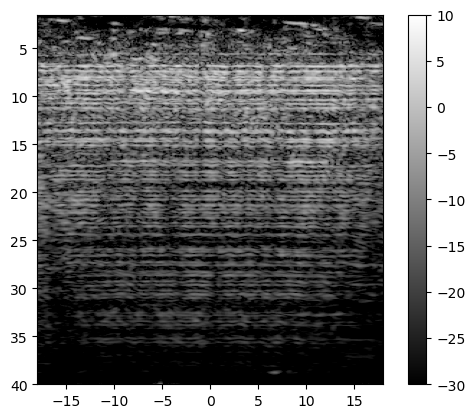

In [16]:
files = ["exfiles_wscat/deg-8_bf.bin","exfiles_wscat/deg0_bf.bin"]

bindata = 0
for file in files:
    bindata += np.fromfile(file, dtype=np.double)
bindata = bindata.reshape((267,-1)).T

env = np.abs(sig.hilbert(bindata, axis=0))
logged = 20*np.log10(env/np.percentile(env, 99))
plt.figure()
plt.imshow(logged, extent = [-20, 20, 40, 1.5], vmin=-30, vmax=10, cmap='gray')
plt.xlim(-18, 18)
plt.colorbar()
plt.show()